In [11]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

/root/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

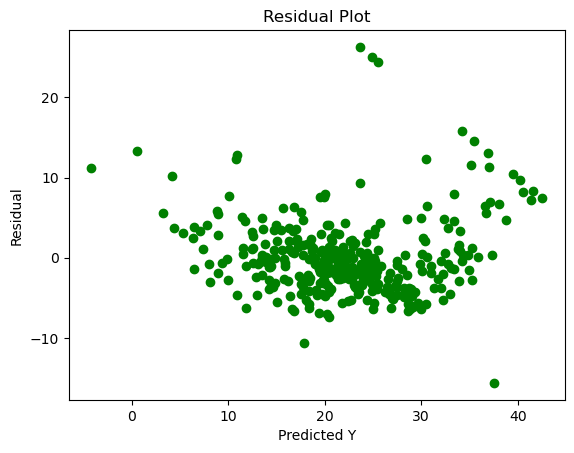


 Model coeffiecients
	Coefficient 1 -0.111
	Coefficient 2 0.044
	Coefficient 3 0.053
	Coefficient 4 2.234
	Coefficient 5 -15.840
	Coefficient 6 3.892
	Coefficient 7 0.001
	Coefficient 8 -1.321
	Coefficient 9 0.285
	Coefficient 10 -0.012
	Coefficient 11 -0.903
	Coefficient 12 0.008
	Coefficient 13 -0.528

	Intercept 33.238

Model Performance in Trainin set

	Mean squared error = 23.17

Model Performance in Training set

	Mean squared error = 18.27


NameError: name 'PolynominalFeatures' is not defined

In [15]:
def get_data():
    """
    Return boston dataset
    as x - predictor and
    y - respınse variable
    """
    data = load_boston()
    x = data['data']
    y = data['target']
    return x, y

def build_model(x, y):
    """
    Build a linear regression model
    """
    model = LinearRegression(normalize=True, fit_intercept=True)
    model.fit(x, y)
    return model

def view_model(model):
    """
    Look at model coeffiecients
    """
    print("\n Model coeffiecients")
    print("=======================")
    
    for i, coef in enumerate(model.coef_):
        print("\tCoefficient %d %0.3f"%(i+1, coef))
    
    print("\n\tIntercept %0.3f"%(model.intercept_))
    
def model_worth(true_y, predicted_y):
    """
    Evaluate the model
    """
    print("\tMean squared error = %0.2f"%(mean_squared_error(true_y, predicted_y)))

def plot_residual(y, predicted_y):
    """
    Plot residuals
    """
    plt.cla()
    plt.xlabel("Predicted Y")
    plt.ylabel("Residual")
    plt.title("Residual Plot")
    plt.figure(1)
    diff = y - predicted_y
    plt.plot(predicted_y, diff, 'go')
    plt.show()
    
def subset_selection(x,y):
    """
    subset selection method
    """
    # declare variables to track
    # the model and attributes which produces
    # lowest mean square error
    choosen_subset = None
    low_mse = 1e100
    choosen_model = None
    # k value ranges from 1 to the number of
    # attributes in x
    for k in range(1,x.shape[1]+1):
        print("k= %d "%(k))
        # evaluate all attribute combinations
        # of size k+1
        subsets = combinations(range(0,x.shape[1]),k+1)
        for subset in subsets:
            x_subset = x[:,subset]
            model = build_model(x_subset,y)
            predicted_y = model.predict(x_subset)
            current_mse = mean_squared_error(y,predicted_y)
            if current_mse < low_mse:
                low_mse = current_mse
                choosen_subset = subset
                choosen_model = model
    return choosen_model, choosen_subset,low_mse
    
if __name__ == "__main__":
    x, y = get_data()
    
    #Divide the data into Train, dev and test
    x_train, x_test_all, y_train, y_test_all = train_test_split(x, y, test_size = 0.3, random_state=9)
    x_dev,x_test,y_dev,y_test = train_test_split(x_test_all,y_test_all,test_size=0.3,random_state=9)
    #Build the model
    model = build_model(x_train, y_train)
    predicted_y = model.predict(x_train)
    
    #Plot the residual
    plot_residual(y_train, predicted_y)
    
    #View model coeffiecient
    view_model(model)
    
    print("\nModel Performance in Trainin set\n")
    model_worth(y_train, predicted_y)
    
    #Apply the model on dev set
    predicted_y = model.predict(x_dev)
    print("\nModel Performance in Training set\n")
    model_worth(y_dev, predicted_y)
    
    #Prepare some polynomial features
    poly_features = PolynominalFeatures(2)
    poly_features.fit(x_train)
    x_train_poly = poly_features.transform(x_train)
    x_dev_poly = poly_features.transform(x_dev)
    
    #Build model with polynominal features
    model_poly = build_model(x_train_poly, y_train)
    predicted_y = model_poly.predict(x_train_poly)
    print("\nModel Performance in Training set (Polynominal features)\n")
    model_worth(y_train, predicted_y)
    
    #Apply the model on dev set
    predicted_y = model_poly.predict(x_dev_poly)
    print("\nModel Performance in Dev set (Polynomial features)\n")
    model_worth(y_dev, predicted_y)
    
    
    #Apply the model on dev set
    predicted_y = model_poly.predict(x_dev_poly)
    print("\nModel Performance in Dev set (Polynomial features)\m")
    model_worth(y_dev, predicted_y)
    
    #Apply the model on Test set
    x_test_poly = poly_features.transform(x_test)
    predicted_y = model_poly.predict(x_test_poly)
    
    print("\nModel Performance in Test set (Polynomial features)\n", model_worth(y_test, predicted_y))
    predicted_y = model.predict(x_test)
    print("\n Model Performance in Test set\n",  model_worth(y_test,predicted_y))
